Importing Credit dataset

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
names = ['Checking account', 'Duration', 'Credit history', 'Purpose', 'Credit amount', 'Saving accounts', 'Employment since', 'Installment rate', 'Sex', 'Other debtors', 'Present residence since', 'Property', 'Age', 'Other installment plans', 'Housing', 'Existing credits', 'Job', 'Number of liable people',  'Telephone', 'Foreign worker', 'class' ]
data = pd.read_csv(io.BytesIO(uploaded['german_credit_data.csv']),names=names)

Saving german_credit_data.csv to german_credit_data.csv


Getting top 10 rows of dataset

In [77]:
data.head(10)

,Checking account,Credit history,Purpose,Saving accounts,Employment since,Sex,Other debtors,Property,Other installment plans,Housing,...,Telephone,Foreign worker,Duration,Credit amount,Installment rate,Present residence since,Age,Existing credits,Number of liable people,class
0,3.0,4.0,3.0,4.0,2.0,3.0,0.0,2.0,2.0,1.0,...,0.0,1.0,0.088235,0.100088,0.333333,0.000000,0.125000,0.333333,0.0,0
1,3.0,3.0,4.0,4.0,4.0,2.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.647059,0.384505,0.666667,0.666667,0.232143,0.333333,1.0,0
2,2.0,2.0,3.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.205882,0.154011,0.000000,0.000000,0.464286,0.000000,0.0,0
3,1.0,2.0,0.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,...,1.0,0.0,0.161765,0.131011,0.333333,1.000000,0.160714,0.333333,0.0,1
4,1.0,2.0,3.0,1.0,2.0,1.0,1.0,2.0,2.0,0.0,...,0.0,0.0,0.382353,0.175580,0.333333,1.000000,0.035714,0.000000,0.0,1
5,3.0,2.0,4.0,0.0,3.0,2.0,0.0,2.0,2.0,1.0,...,1.0,0.0,0.294118,0.111918,1.000000,0.333333,0.160714,0.000000,0.0,0
6,0.0,4.0,3.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.205882,0.043964,1.000000,1.000000,0.035714,0.000000,0.0,0
7,0.0,2.0,3.0,0.0,2.0,2.0,0.0,1.0,2.0,1.0,...,0.0,0.0,0.294118,0.215638,1.000000,1.000000,0.160714,0.000000,0.0,0
8,1.0,3.0,1.0,0.0,4.0,2.0,0.0,2.0,2.0,1.0,...,1.0,0.0,0.338235,0.314460,0.000000,0.333333,0.196429,0.333333,0.0,0
9,1.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,2.0,1.0,...,1.0,0.0,0.161765,0.363156,0.000000,0.333333,0.267857,0.000000,1.0,1


Getting dimensions of dataset

In [78]:
data.shape

(836, 21)

##**R1**

Apply

1.   MinMaxScalar to numerical data to normalise it
2.   LabelEncoder on the class column
3.   OrdinalEncoder to do one hot encoding on Categorical Data



In [79]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define numerical and categorical variables
num_cols = ['Duration', 'Credit amount', 'Installment rate', 'Present residence since', 'Age', 'Existing credits', 'Number of liable people']
cat_cols = ['Checking account', 'Credit history', 'Purpose', 'Saving accounts', 'Employment since', 'Sex',
            'Other debtors', 'Property', 'Other installment plans', 'Housing', 'Job', 'Telephone', 'Foreign worker']

# Apply LabelEncoder to class labels
class_le = LabelEncoder()
y = class_le.fit_transform(data['class'])
y = pd.DataFrame(y, columns=['class'])

# Apply MinMaxScaler to numerical variables
scaler = MinMaxScaler()
scaled_num = scaler.fit_transform(data[num_cols])

# Create DataFrame from scaled numerical variables
scaled_df = pd.DataFrame(scaled_num, columns=num_cols)

ohe = OneHotEncoder(drop='first', sparse=False)

oe = OrdinalEncoder()
oe.fit(data[cat_cols])
encoded_cat = oe.transform(data[cat_cols])
encoded_columns = oe.get_feature_names_out(cat_cols)

encoded_df = pd.DataFrame(encoded_cat, columns=encoded_columns)

# Concatenate encoded categorical variables and scaled numerical variables
x = pd.concat([encoded_df, scaled_df], axis=1)

# Print the preprocessed DataFrame
print(x.columns)
x


Index(['Checking account', 'Credit history', 'Purpose', 'Saving accounts',
       'Employment since', 'Sex', 'Other debtors', 'Property',
       'Other installment plans', 'Housing', 'Job', 'Telephone',
       'Foreign worker', 'Duration', 'Credit amount', 'Installment rate',
       'Present residence since', 'Age', 'Existing credits',
       'Number of liable people'],
      dtype='object')


,Checking account,Credit history,Purpose,Saving accounts,Employment since,Sex,Other debtors,Property,Other installment plans,Housing,Job,Telephone,Foreign worker,Duration,Credit amount,Installment rate,Present residence since,Age,Existing credits,Number of liable people
0,3.0,41.0,3.0,4.0,31.0,3.0,0.0,31.0,2.0,1.0,40.0,0.0,7.0,0.107143,0.100088,0.333333,0.000000,0.125000,0.333333,0.0
1,3.0,29.0,4.0,4.0,50.0,2.0,0.0,31.0,0.0,1.0,40.0,0.0,0.0,0.785714,0.384505,0.666667,0.666667,0.232143,0.333333,1.0
2,2.0,20.0,3.0,0.0,15.0,1.0,0.0,13.0,1.0,1.0,9.0,0.0,0.0,0.250000,0.154011,0.000000,0.000000,0.464286,0.000000,0.0
3,1.0,20.0,0.0,1.0,31.0,1.0,0.0,31.0,2.0,0.0,40.0,1.0,0.0,0.196429,0.131011,0.333333,1.000000,0.160714,0.333333,0.0
4,1.0,20.0,3.0,1.0,31.0,1.0,1.0,31.0,2.0,0.0,40.0,0.0,0.0,0.464286,0.175580,0.333333,1.000000,0.035714,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,0.0,20.0,0.0,0.0,12.0,1.0,0.0,0.0,2.0,1.0,8.0,0.0,0.0,0.142857,0.128150,0.729599,0.000000,0.287715,0.000000,0.0
832,3.0,41.0,0.0,0.0,28.0,2.0,0.0,44.0,0.0,1.0,40.0,0.0,0.0,0.357143,0.543469,0.452907,0.333333,0.427211,0.000000,0.0
833,0.0,20.0,3.0,0.0,44.0,2.0,0.0,31.0,2.0,1.0,40.0,0.0,0.0,0.571429,0.025806,0.582707,1.000000,0.256814,0.000000,0.0
834,0.0,38.0,1.0,0.0,50.0,2.0,0.0,44.0,2.0,2.0,40.0,0.0,0.0,0.785714,0.048751,1.000000,1.000000,0.511003,0.000000,0.0


Splitting datatset into 2 sets: one for training(60%) and other(40%) for testing+validation

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test_val, y_train, y_test_val = train_test_split(x,y, test_size=0.4, random_state=42)

Splitting validation+Testing into separate sets

In [81]:
X_test, X_val, y_test, y_val = train_test_split(X_test_val,y_test_val, test_size=0.5, random_state=42)

Checking the shape of train,test and validate datasets

In [82]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)


(501, 20)
(167, 20)
(168, 20)
(501, 1)
(167, 1)
(168, 1)


Calculating how many null values are present in each column

In [83]:
print (X_train.isnull().sum())

Checking account           0
Credit history             0
Purpose                    0
Saving accounts            0
Employment since           0
Sex                        0
Other debtors              0
Property                   0
Other installment plans    0
Housing                    0
Job                        0
Telephone                  0
Foreign worker             0
Duration                   0
Credit amount              0
Installment rate           0
Present residence since    0
Age                        0
Existing credits           0
Number of liable people    0
dtype: int64


##**R2**

Generating a linear perceptron model and deploying it on Test partition

In [84]:
from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42)
p.fit(X_train, y_train)

Perceptron(random_state=42)

Displaying F measure values for each class

In [85]:
from sklearn.metrics import accuracy_score

y_pred = p.predict(X_train)
from sklearn.metrics import f1_score
f1 = f1_score(y_train, y_pred,average=None)
print(f1)

[0.64900662 0.71038251]


##**R3**

Checking count of each class in the dataset

In [86]:
from collections import Counter
Counter(y_train['class'].values)

Counter({0: 244, 1: 257})

Applying SMOTENC on the above unbalanced dataset

In [87]:
from imblearn.over_sampling import SMOTENC
from sklearn.datasets import make_classification

categorical_features=[0,2,3,5,6,8,9,11,13,14,16,18,19]
smotenc = SMOTENC(categorical_features=categorical_features, random_state=42,sampling_strategy=1.0, k_neighbors=5)
X_resampled, y_resampled = smotenc.fit_resample(X_train, y_train)
Counter(y_resampled['class'].values)


Counter({0: 257, 1: 257})

Generating perceptron on the above oversampled training dataset

In [88]:
q = Perceptron(random_state=42)
q.fit(X_resampled, y_resampled)
y_pred = q.predict(X_resampled)

Getting F measure for each of the classes

In [89]:
from sklearn.metrics import f1_score
f1 = f1_score(y_resampled, y_pred,average=None)
print(f1)

[0.40816327 0.70364964]


##**R4**

Initially there was an evident difference in the F values of minority class and majority class. Since the dataset was unbalanced, majority class's F value was high than the minority class. So the model was more biased towards the majority class giving a high F value. Later on, after oversampling the dataset using SMOTENC the F values of both the classes were comparatively same differing a bit. The model is now able to predict both the classes with approx same efficiency since the dataset is balanced now.

This results in a more equitable performance between the majority and minority classes, reducing bias towards the majority class and creating a more balanced and robust model.

##**R5**

In order to determine which features are least significant we need to observe the coefficients (weights) assigned to each feature from the trained perceptron model. The two features with the smallest absolute coefficients are likely to be the least significant predictors.
The two least significant predictors have the lowest absolute coefficients, suggesting weaker correlations with the target variable and less impact on the model's predictions. It might be possibly because of their weaker correlations or overlap with other features.

In [90]:
print("Coefficients are" ,q.coef_)

Coefficients are [[-4.74000000e+02 -6.33131625e+01  1.80000000e+01 -3.14000000e+02
   2.78809536e-01  7.50000000e+01 -8.00000000e+01  5.10000000e+01
   2.24000000e+02  1.06000000e+02  7.10000000e+01 -1.10000000e+02
  -1.19107983e+02  8.35535714e+01  4.38628260e+01  1.37758164e+02
   3.83333333e+01 -3.90858308e+01 -3.73333333e+01 -2.10000000e+01]]


Finding least significant predictors

In [91]:
import numpy as np
coefficients = q.coef_[0]
feature_names = np.array(X_train.columns)

# Identify the two least significant predictors
least_significant_indices = np.argsort(np.abs(coefficients))[:2]
least_significant_features = feature_names[least_significant_indices]
print(least_significant_features)
print(least_significant_indices)

['Employment since' 'Purpose']
[4 2]


Least significant predictors are 'Employment since' AND 'Purpose' columns

Dropping the least significant features and regenerating the linear perceptron model to display the F values on the two classes.


In [92]:
# Assuming X_resampled is a pandas DataFrame
X_new = X_resampled.drop(X_resampled.columns[[2, 4]], axis=1)

model_reduced = Perceptron(random_state=42)
model_reduced.fit(X_new, y_resampled)

y_pred = model_reduced.predict(X_new)
from sklearn.metrics import f1_score
f1 = f1_score(y_resampled, y_pred,average=None)
print(f1)


[0.71705426 0.71484375]


Confusion matrix for the results

[[185  72]
 [ 74 183]]


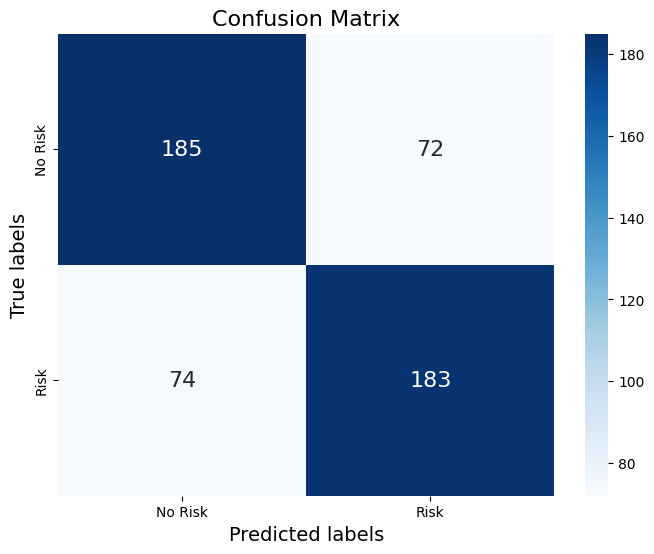

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_resampled, y_pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', annot_kws={"size": 16},xticklabels=["No Risk",'Risk'], yticklabels=['No Risk','Risk'])
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

##**R6**

 Identifying the two most significant predictors, we observe the coefficients (weights) assigned to each feature from the trained perceptron model. The two features with the highest absolute coefficients are likely to be the most significant predictors.
The two most significant predictors have the largest absolute coefficients, suggesting stronger correlations with the target variable and more impact on the model's predictions.


In [94]:
print("Model coeff ",model_reduced.coef_)

Model coeff  [[-419.          -42.78789752 -280.           32.          -70.
   -10.          203.           93.           34.         -117.
  -115.10798281   79.05357143   46.44404094  112.14173495   20.33333333
   -42.38120427  -35.          -29.        ]]


In [104]:
coefficients = model_reduced.coef_[0]
feature_names = np.array(X_new.columns)

# Identify the two least significant predictors
most_significant_indices = np.argsort(np.abs(coefficients))[::-1][:2]
most_significant_features = feature_names[most_significant_indices]

# Print the two most significant features
print("The two most significant predictors are:", most_significant_features)
print(most_significant_indices)

The two most significant predictors are: ['Checking account' 'Saving accounts']
[0 2]


The two most significant predictors are 'Checking account' and 'Saving accounts'

##**R7**

In [105]:
import warnings
warnings.filterwarnings("ignore")

Finding the optimal combination of oversampling ratio (or) and n values

In [114]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score

# Define the parameter grid for grid search
param_grid = {
    'sampling_strategy': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'k_neighbors': list(range(1, 21))
}

# Initialize lists to store results
f1_scores = []
smote_params_list = []

# Loop through each combination of SMOTE parameters
for sampling_strategy in param_grid['sampling_strategy']:
    for k_neighbors in param_grid['k_neighbors']:
        # Create SMOTE resampler
        categorical_features=[0,2,3,5,6,8,9,11,13,14,16,18,19]
        smotenc = SMOTENC(categorical_features=categorical_features, random_state=42, sampling_strategy=sampling_strategy, k_neighbors=k_neighbors)

        # Resample the training set
        X_train_resampled, y_train_resampled = smotenc.fit_resample(X_train, y_train)

        # Initialize and train Perceptron model
        perceptron = Perceptron()
        perceptron.fit(X_train_resampled, y_train_resampled)

        # Predict on the validation set
        y_pred_val = perceptron.predict(X_val)

        # Calculate F1 score on the validation set
        f1 = f1_score(y_val, y_pred_val, average='macro')

        # Store the F1 score and corresponding SMOTE parameters
        f1_scores.append(f1)
        smote_params_list.append({'sampling_strategy': sampling_strategy, 'k_neighbors': k_neighbors})

# Find the index of the best F1 score
best_f1_index = np.argmax(f1_scores)
best_f1_score = f1_scores[best_f1_index]
best_smote_params = smote_params_list[best_f1_index]

print("Best F1 score on validation set:", best_f1_score)
print("Corresponding SMOTE parameters:", best_smote_params)


Best F1 score on validation set: 0.7017283234899815
Corresponding SMOTE parameters: {'sampling_strategy': 1.0, 'k_neighbors': 6}


In [115]:
from imblearn.over_sampling import SMOTENC
from sklearn.datasets import make_classification

categorical_features=[0,2,3,5,6,8,9,11,13,14,16,18,19]
smotenc = SMOTENC(categorical_features=categorical_features, random_state=42,sampling_strategy=1.0, k_neighbors=6)
X_resampled, y_resampled = smotenc.fit_resample(X_train, y_train)
Counter(y_resampled['class'].values)


Counter({0: 257, 1: 257})

Again retraining the model

In [117]:
X_train_new = X_resampled.drop(X_resampled.columns[[2, 4]], axis=1)
q = Perceptron(random_state=42)
q.fit(X_train_new, y_train_resampled)
y_train_pred = q.predict(X_train_new)
f1 = f1_score(y_train_resampled, y_train_pred,average=None)
print(f1)

[0.76512456 0.7167382 ]


  Testing on validation dataset

In [119]:
X_val_new = X_val.drop(X_val.columns[[2, 4]], axis=1)
y_val_pred = q.predict(X_val_new)
from sklearn.metrics import f1_score
f1 = f1_score(y_val, y_val_pred, average=None)
print(f1)

[0.73195876 0.63380282]


Testing on test dataset

In [120]:
X_test_new = X_test.drop(X_test.columns[[2, 4]], axis=1)
y_test_pred = q.predict(X_test_new)
f1 = f1_score(y_test, y_test_pred,average=None)
print(f1)

[0.75409836 0.70198675]
